In [1]:
import libsbml
from utils import functions
from utils import graph_functions
from utils import complete_tests
import random
import pickle
import numpy as np
import os
from collections import defaultdict
from copy import deepcopy

In [2]:
total_species = 0
uncertain_species = 0
correct_species = 0
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0 
deltas_normal = []
deltas_uncertain = []
dir = 'altered_pathways'
for experiment in list(os.listdir(dir)):
    if experiment == '.DS_Store': continue
    res_path = os.path.join(dir, experiment, 'results')
    res_file = open(res_path, 'rb')
    results = pickle.load(res_file)
    res_file.close()
    insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered', results, 1, detailed_classification=True, threshold=0, ignore_uncertain=False)
    
    total_species += all
    uncertain_species += uncertain
    
    for d in d_normal:
        deltas_normal.append(d)
    for d in d_uncertain:
        deltas_uncertain.append(d)
        
    total_count = 0
    correct_count = 0
    for specie in insights.keys():
        
        if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
            continue
        
        total_count += 1
        if insights[specie][0] == insights[specie][1][0]:
            correct_count += 1
            correct_species += 1
        
        if insights[specie][1][0] == insights[specie][0] == 1:
            true_positives += 1
        elif insights[specie][1][0] == insights[specie][0] == -1:
            true_negatives += 1
        elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
            false_positives += 1
        elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
            false_negatives += 1
        

Specie:  Raf1 expected result:  decreased  normal final:  0.16124445149383296  altered final:  0.15047446571014023
confidence interval:  [0.2624730581742929, 0.2713176304882657]
deltas coming from simulation:  [-0.010769985783692732, 0.0003596793337889824]
Specie:  RKIP expected result:  increased  normal final:  0.5883117548480797  altered final:  0.6324813793681946
confidence interval:  [0.9998606280198595, 0.9998791535532524]
deltas coming from simulation:  [0.04416962452011486, 0.0013264774767260796]
Specie:  Raf1_RKIP expected result:  increased  normal final:  0.31456528724350086  altered final:  0.3217587096325048
confidence interval:  [0.6661617608777062, 0.6758821246532686]
deltas coming from simulation:  [0.007193422389003945, 0.00022867820070164414]
Specie:  Raf1_RKIP_ERKPP expected result:  increased  normal final:  1.5241902609405158  altered final:  1.5277668253525014
confidence interval:  [0.5414632818192647, 0.5447024204636024]
deltas coming from simulation:  [0.0035765

In [3]:
print('total: ', total_species, ' correct: ', correct_species, ' uncertain: ', uncertain_species, ' true pos: ', true_positives, ' true neg: ', true_negatives, ' false_pos: ', false_positives, 'false neg: ', false_negatives,)

total:  121  correct:  115  uncertain:  0  true pos:  60  true neg:  55  false_pos:  2 false neg:  4


In [2]:
res_path = 'altered_pathways/reaction_6/results'
desc_path = 'altered_pathways/reaction_6/description'
res_file = open(res_path, 'rb')
desc_file = open(desc_path, 'rb')
r = pickle.load(res_file)
description = pickle.load(desc_file)
desc_file.close()
res_file.close()
print(description['altered'])
true_negatives = 0
true_positives = 0
false_positives = 0
false_negatives = 0
insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered', r, 1, detailed_classification=True, threshold=0, ignore_uncertain=False)

total_species = 0
uncertain_species = 0
correct_species = 0
total_species += all
uncertain_species += uncertain
        
total_count = 0
correct_count = 0
for specie in insights.keys():
        
    if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
        continue
        
    total_count += 1
    if insights[specie][0] == insights[specie][1][0]:
        correct_count += 1
        correct_species += 1
        
    if insights[specie][1][0] == insights[specie][0] == 1:
        true_positives += 1
    elif insights[specie][1][0] == insights[specie][0] == -1:
        true_negatives += 1
    elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
        false_positives += 1
    elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
        false_negatives += 1
        
        
         
print( ' total species: ', total_count, 'correct species: ', correct_count, 'ratio: ', correct_count/total_count)

MEKPP_ERK_complex_disassembly__ERK_unphosphorylated
Specie:  Raf1 expected result:  decreased  normal final:  0.16124445149383296  altered final:  0.1515476781534649
confidence interval:  [0.475423088953988, 0.47933154152294283]
deltas coming from simulation:  [-0.009696773340368059, 0.00029156790309175064]
Specie:  RKIP expected result:  decreased  normal final:  0.5883117548480797  altered final:  0.5852220865226514
confidence interval:  [0.5444355625944379, 0.5510921395383797]
deltas coming from simulation:  [-0.003089668325428341, 6.490470593177484e-06]
Specie:  Raf1_RKIP expected result:  increased  normal final:  0.31456528724350086  altered final:  0.4617717067970394
confidence interval:  [0.5903313683742729, 0.5988234270679107]
deltas coming from simulation:  [0.14720641955353853, 0.0046796778132606855]
Specie:  Raf1_RKIP_ERKPP expected result:  decreased  normal final:  1.5241902609405158  altered final:  1.3866806147496864
confidence interval:  [0.3954145958282005, 0.40340046

In [2]:
results2 = {'total_species': 0,
 'uncertain_species': 0,
 'correct_species': 0,
 'true_positives': 0,
 'false_positives': 0,
 'true_negatives': 0,
 'false_negatives': 0,
 'deltas_normal': [],
 'deltas_uncertain': []}
results_path = '../../../results/real_dataset/large_class/results2'
results_file = open(results_path, 'wb')
pickle.dump(results2, results_file)
results_file.close()

In [5]:
results_path = '../../../results/real_dataset/large_class/results'
results_file = open(results_path, 'rb')
partial_results = pickle.load(results_file)
results_file.close()
partial_results

{'total_species': 4229,
 'uncertain_species': 263,
 'correct_species': 3131,
 'true_positives': 1500,
 'false_positives': 592,
 'false_negatives': 506,
 'true_negatives': 1631}

In [2]:
description = {
    'species': [],
    'reactions': [],
    'connections': [],
    'altered': ''
}

In [3]:
def alter_pathway(input_filename, output_filename, alterations):
    reader = libsbml.SBMLReader()
    document = reader.readSBML(input_filename)
    model = document.getModel()

    for i in range(model.getNumParameters()):
        param = model.getParameter(i)
        if param.getId() == alterations:
            previous_value = param.getValue()
            param.setValue(previous_value * 100)
            modified_sbml = libsbml.writeSBML(document, output_filename)
            return 

In [4]:
def generate_test_set(filename):
    reader = libsbml.SBMLReader()
    document = reader.readSBML(filename)
    model = document.getModel()
    
    for i in range(model.getNumParameters()):
        base_dir = 'altered_pathways2'
        alteration_dir = os.path.join(base_dir, 'reaction_' + str(i))
        file_dir = os.path.join(alteration_dir, 'reaction_' + str(i) + '100x.xml')
        os.makedirs(alteration_dir, exist_ok=True)
        
        param = model.getParameter(i)

        alter_pathway(filename, file_dir, param.getId())

In [5]:
generate_test_set('BIOMD0000000647.xml')

In [6]:
def convert_sbml_to_network(file_path):
    
    reader = libsbml.SBMLReader()
    document = reader.readSBML(file_path)
    if document.getNumErrors() > 0:
        print("Errors occurred while loading the SBML file.")
    model = document.getModel()
    
    num_reactions = model.getNumReactions()
    num_species = model.getNumSpecies()
    
    print('number reactions', model.getNumReactions())
    print('number species', model.getNumSpecies()) 
    
    for i in range(num_species):
        description['species'].append(model.getSpecies(i).getId())
    
    for i in range(num_reactions):
        description['reactions'].append([model.getReaction(i).getId(), 0, 1])
        num_reactants = model.getReaction(i).getNumReactants()
        num_products = model.getReaction(i).getNumProducts()
        
        num_parameters = model.getReaction(i).getKineticLaw().getNumParameters()
        is_reversible = False
        if num_parameters == 2:
            is_reversible = True
            
        if is_reversible:
            description['reactions'].append([str(model.getReaction(i).getId() + 'revert'), 0, 1])
        
        for j in range(num_reactants):
            reactant = model.getReaction(i).getReactant(j).getSpecies()
            description['connections'].append([reactant, model.getReaction(i).getId()])
            if is_reversible:
                description['connections'].append([str(model.getReaction(i).getId() + 'revert'), reactant])
            
        for k in range(num_products):
            product = model.getReaction(i).getProduct(k).getSpecies()
            description['connections'].append([model.getReaction(i).getId(), product])
            if is_reversible:
                description['connections'].append([product, str(model.getReaction(i).getId() + 'revert')])

In [7]:
convert_sbml_to_network('BIOMD0000000647.xml')

number reactions 11
number species 11


In [8]:
for i in range(len(description['reactions'])):
    desc = deepcopy(description)
    desc['altered'] = desc['reactions'][i][0]
    base_dir = 'altered_pathways2'
    alteration_dir = os.path.join(base_dir, 'reaction_' + str(i))
    description_path = os.path.join(alteration_dir, 'description')
    description_file = open(description_path, 'wb')
    pickle.dump(desc, description_file)
    description_file.close()
    

In [9]:
desc_path = 'altered_pathways2/reaction_6/description'
desc_file = open(desc_path, 'rb')
temp = pickle.load(desc_file)
desc_file.close()
temp

{'species': ['Raf1',
  'RKIP',
  'Raf1_RKIP',
  'Raf1_RKIP_ERKPP',
  'ERK',
  'RKIPP',
  'MEKPP',
  'MEKPP_ERK',
  'ERKPP',
  'RP',
  'RKIPP_RP'],
 'reactions': [['Raf1_RKIP_complex_formation', 0, 1],
  ['Raf1_RKIP_complex_disassembly', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_formation', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_disassembly__ERK_phosphorylation', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_disassembly__RKIP_phosphorylation', 0, 1],
  ['MEKPP_ERK_complex_formation', 0, 1],
  ['MEKPP_ERK_complex_disassembly__ERK_unphosphorylated', 0, 1],
  ['MEKPP_ERK_complex_disassembly__ERK_phosphorylated', 0, 1],
  ['RKIPP_RP_comlex_formation', 0, 1],
  ['RKIPP_RP_complex_disassembly__phosphorylated_RKIP', 0, 1],
  ['RKIPP_RP_complex_disassembly__unphosphorylated_RKIP', 0, 1]],
 'connections': [['Raf1', 'Raf1_RKIP_complex_formation'],
  ['RKIP', 'Raf1_RKIP_complex_formation'],
  ['Raf1_RKIP_complex_formation', 'Raf1_RKIP'],
  ['Raf1_RKIP', 'Raf1_RKIP_complex_disassembly'],
  ['Raf1_RKIP_complex_disassembl

In [2]:
total_species = 0
uncertain_species = 0
correct_species = 0
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0 
deltas_normal = []
deltas_uncertain = []

complete_results = defaultdict()
for directory in list(os.listdir('altered_pathways2')):
    if directory == '.DS_Store':
        continue
    dir = os.path.join('altered_pathways2', directory)
    files = os.listdir(dir)
    description_index = 0
    altered_file_index = 0
    
    for i in range(len(files)):
        if files[i] == 'description':
            description_index = i
        elif files[i] != 'description' and files[i] != 'results':
            altered_file_index = i
            
    res = complete_tests.complete_tests2(
            'BIOMD0000000647.xml',
            os.path.join(dir, files[altered_file_index]),
            os.path.join(dir, 'description'),
            []
        )
    
    complete_results_path = os.path.join(dir, 'results')
    complete_results_file = open(complete_results_path, 'wb')
    pickle.dump(res, complete_results_file)
    complete_results_file.close()
        
    insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered', res, 1, detailed_classification=False, threshold=0, ignore_uncertain=False)
    
    total_species += all
    uncertain_species += uncertain
    
    for d in d_normal:
        deltas_normal.append(d)
    for d in d_uncertain:
        deltas_uncertain.append(d)
        
    total_count = 0
    correct_count = 0
    for specie in insights.keys():
        
        if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
            continue
        
        total_count += 1
        if insights[specie][0] == insights[specie][1][0]:
            correct_count += 1
            correct_species += 1
        
        if insights[specie][1][0] == insights[specie][0] == 1:
            true_positives += 1
        elif insights[specie][1][0] == insights[specie][0] == -1:
            true_negatives += 1
        elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
            false_positives += 1
        elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
            false_negatives += 1
        
        
         
    print(directory, ' total species: ', total_count, 'correct species: ', correct_count, 'ratio: ', correct_count/total_count)
    complete_results[directory] = correct_count / total_count
    

Converged at time 240.0
Converged at time 238.0
Specie:  Raf1 expected result:  decreased  normal final:  0.16124445147742356  altered final:  0.15047446553588953
confidence interval:  [0.26207112510872904, 0.2708264904707517]
deltas coming from simulation:  [-0.010769985941534027, 0]
Specie:  RKIP expected result:  increased  normal final:  0.5883117548453582  altered final:  0.6324813792146102
confidence interval:  [0.9998599938977695, 0.9998799955886062]
deltas coming from simulation:  [0.04416962436925198, 0]
Specie:  Raf1_RKIP expected result:  increased  normal final:  0.31456528741693696  altered final:  0.32175871146477963
confidence interval:  [0.6667425893375746, 0.6759794081325058]
deltas coming from simulation:  [0.007193424047842678, 0]
Specie:  Raf1_RKIP_ERKPP expected result:  increased  normal final:  1.5241902607838391  altered final:  1.527766823694185
confidence interval:  [0.5417130460670959, 0.5445932610728119]
deltas coming from simulation:  [0.003576562910345915,

In [3]:
scores = []
for experiment in complete_results.keys():
    scores.append(complete_results[experiment])
print('Average score: ', np.average(np.array(scores)))

Average score:  0.9504132231404957


In [4]:
print('total: ', total_species, ' correct: ', correct_species, ' uncertain: ', uncertain_species, ' true pos: ', true_positives, ' true neg: ', true_negatives, ' false_pos: ', false_positives, 'false neg: ', false_negatives,)

total:  121  correct:  115  uncertain:  0  true pos:  60  true neg:  55  false_pos:  2 false neg:  4


In [6]:
partial_results['total_species'] += total_species
partial_results['uncertain_species'] += uncertain_species
partial_results['correct_species'] += correct_species
partial_results['true_positives'] += true_positives
partial_results['false_positives'] += false_positives
partial_results['true_negatives'] += true_negatives
partial_results['false_negatives'] += false_negatives

In [7]:
results_path = '../../../results/real_dataset/large_class/results'
results_file = open(results_path, 'wb')
pickle.dump(partial_results, results_file)
results_file.close()

In [15]:
scores

[1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8181818181818182,
 1.0,
 0.9090909090909091,
 1.0,
 1.0,
 0.9090909090909091,
 0.6363636363636364]

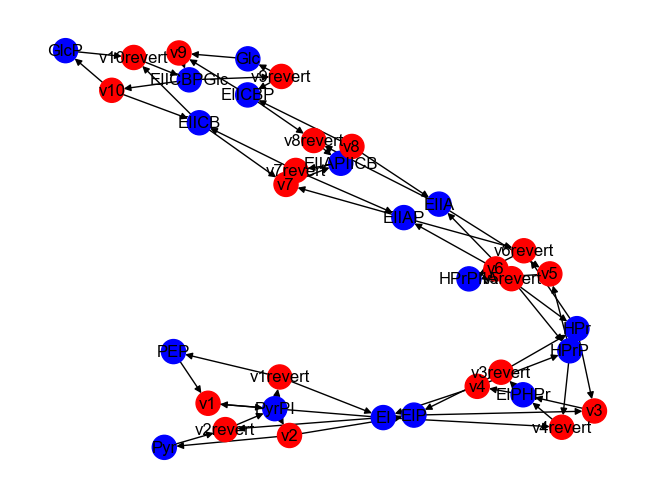

In [6]:
graph = functions.generate_graph(description)
functions.plot_graph(graph)

In [6]:
description['altered'] = 'MEKPP_ERK_complex_disassembly__ERK_unphosphorylated'
description_path = 'description_reaction1_altered'
description_file = open(description_path, 'ab')
pickle.dump(description, description_file)
description_file.close()

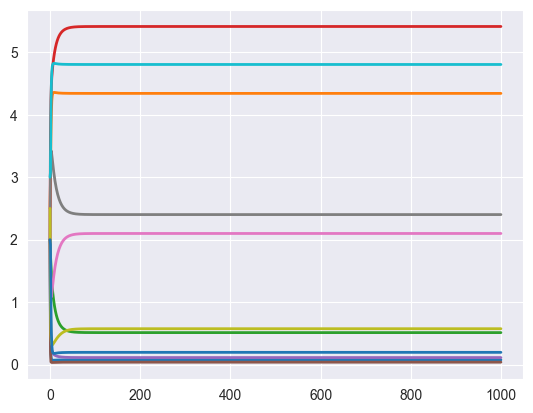

       time,    [Raf1],  [RKIP], [Raf1_RKIP], [Raf1_RKIP_ERKPP],    [ERK],   [RKIPP], [MEKPP], [MEKPP_ERK],  [ERKPP],    [RP], [RKIPP_RP]
 [[       0,         2,     2.5,           2,                 2,        2,         2,     2.5,           2,      2.5,       3,          2],
  [   1.001,  0.561494, 2.94221,     1.74989,           3.68861, 0.617677,  0.199625, 1.22687,     3.27313, 0.920578, 3.08034,    1.91966],
  [   2.002,  0.161049, 3.64249,     1.59553,           4.24342, 0.352527, 0.0434694, 1.07505,     3.42495, 0.479102, 4.02492,   0.975085],
  [   3.003,  0.083337, 4.04314,     1.43984,           4.47682, 0.259022, 0.0347585, 1.08706,     3.41294, 0.351217, 4.49456,   0.505442],
  [   4.004, 0.0709293, 4.22909,     1.32166,           4.60741,  0.21767, 0.0337844, 1.14304,     3.35696, 0.317954, 4.69194,   0.308055],
  [ 5.00501, 0.0689752, 4.30813,     1.23073,           4.70029, 0.195723, 0.0337445,  1.2105,      3.2895, 0.314478,  4.7729,   0.227102],
  [ 6.00601, 0.0689058

In [15]:
final_concentrations_normal = functions.plot_simulation_complete('BIOMD0000000647_concentrations.xml')

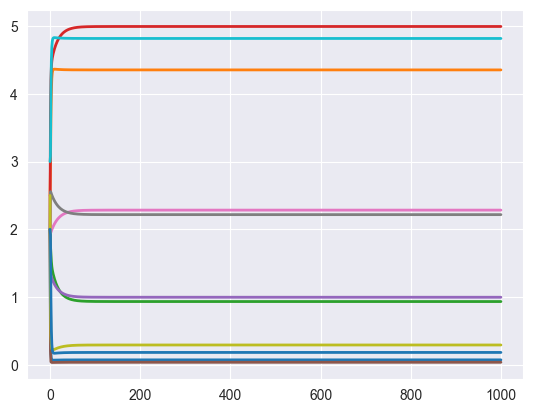

       time,    [Raf1],  [RKIP], [Raf1_RKIP], [Raf1_RKIP_ERKPP],    [ERK],   [RKIPP], [MEKPP], [MEKPP_ERK],  [ERKPP],    [RP], [RKIPP_RP]
 [[       0,         2,     2.5,           2,                 2,        2,         2,     2.5,           2,      2.5,       3,          2],
  [   1.001,  0.561449, 2.94223,     1.75846,           3.68009,  1.36634,   0.19958, 1.94405,     2.55595, 0.897619, 3.08036,    1.91964],
  [   2.002,  0.160737, 3.64282,     1.63462,           4.20464,  1.32177, 0.0432077,  1.9552,      2.5448, 0.428797, 4.02529,   0.974711],
  [   3.003, 0.0826064, 4.04424,      1.5219,           4.39549,  1.29852, 0.0342038, 1.97602,     2.52398, 0.282005, 4.49583,   0.504166],
  [   4.004, 0.0697321, 4.23135,     1.44962,           4.48065,   1.2783, 0.0329139, 1.99443,     2.50557, 0.235483, 4.69453,   0.305473],
  [ 5.00501, 0.0673111, 4.31172,     1.40278,           4.52991,  1.25979, 0.0325623, 2.01127,     2.48873, 0.221575, 4.77697,   0.223029],
  [ 6.00601, 0.0667999

In [16]:
final_concentrations_altered = functions.plot_simulation_complete('altered_pathways_concentrations/reaction_6/reaction_6100x.xml')

In [17]:
species = description['species']
species

['Raf1',
 'RKIP',
 'Raf1_RKIP',
 'Raf1_RKIP_ERKPP',
 'ERK',
 'RKIPP',
 'MEKPP',
 'MEKPP_ERK',
 'ERKPP',
 'RP',
 'RKIPP_RP']

In [18]:
final_normal = final_concentrations_normal[0][-1]
final_altered = final_concentrations_altered[0][-1]

In [19]:
final_normal

[1.00000000e+03 7.57017498e-02 4.34111094e+00 5.12002346e-01
 5.41229590e+00 1.12266074e-01 3.86283759e-02 2.09877012e+00
 2.40122988e+00 5.74208138e-01 4.80403756e+00 1.95962438e-01]

In [20]:
temp = final_concentrations_normal[1]
temp

[2.  2.5 2.  2.  2.  2.  2.5 2.  2.5 3.  2. ]

In [21]:
import math
expected_results = {}
for i in range(len(species)):
    delta1 = 0
    delta2 = 0
    print(species[i])
    if final_normal[i + 1] != 0:
        if temp[i] != 0:
            initial_concentration = temp[i]
            delta1 = math.fabs((final_altered[i + 1] - final_normal[i + 1]) / initial_concentration)
            delta2 = math.fabs(1 - (final_altered[i + 1] / final_normal[i + 1]))
            paired_delta = delta1 * delta2
        else:
            delta2 = math.fabs(1 - (final_altered[i + 1] / final_normal[i + 1]))
            paired_delta = delta2 / 100
            
        relative_delta = (final_altered[i + 1] - final_normal[i + 1]) / final_normal[i + 1]
        
    else: 
        relative_delta = 0
        
    if paired_delta >= 0.0001 and final_altered[i + 1] < final_normal[i + 1]:
        expected_results[species[i]] = 'decreased'
    elif paired_delta >= 0.0001 and final_altered[i + 1] > final_normal[i + 1]:
        expected_results[species[i]] = 'increased'
    else:
        expected_results[species[i]] = 'unchanged'
    
    print('final normal: ', final_normal[i + 1], 'final altered: ', final_altered[i + 1], 'delta: ', final_altered[i + 1] - final_normal[i + 1], 'relative delta ', relative_delta, 'initial concentration: ', temp[i], 'delta1', delta1, 'delta2', paired_delta)

Raf1
final normal:  0.07570174983160038 final altered:  0.07109943379740422 delta:  -0.004602316034196169 relative delta  -0.060795371896080155 initial concentration:  2.0 delta1 0.0023011580170980844 delta2 0.00013989975744112452
RKIP
final normal:  4.3411109360891915 final altered:  4.35465633886932 delta:  0.013545402780128057 relative delta  0.00312026183609369 initial concentration:  2.5 delta1 0.005418161112051223 delta2 1.6906081339740472e-05
Raf1_RKIP
final normal:  0.5120023463527844 final altered:  0.9327226256609573 delta:  0.4207202793081729 relative delta  0.8217155298313505 initial concentration:  2.0 delta1 0.21036013965408645 delta2 0.17285619361125454
Raf1_RKIP_ERKPP
final normal:  5.4122959038156315 final altered:  4.996177940541635 delta:  -0.4161179632739964 relative delta  -0.0768838161602798 initial concentration:  2.0 delta1 0.2080589816369982 delta2 0.01599636849467401
ERK
final normal:  0.11226607412108616 final altered:  0.9962399729900248 delta:  0.8839738988

In [22]:
expected_results

{'Raf1': 'decreased',
 'RKIP': 'unchanged',
 'Raf1_RKIP': 'increased',
 'Raf1_RKIP_ERKPP': 'decreased',
 'ERK': 'increased',
 'RKIPP': 'decreased',
 'MEKPP': 'increased',
 'MEKPP_ERK': 'decreased',
 'ERKPP': 'decreased',
 'RP': 'unchanged',
 'RKIPP_RP': 'decreased'}

In [52]:
description_path = 'description_normal'
description_file = open(description_path, 'rb')
description = pickle.load(description_file)
description_file.close()
description

{'species': ['EI',
  'PyrPI',
  'EIP',
  'HPr',
  'EIPHPr',
  'HPrP',
  'EIIA',
  'HPrPIIA',
  'EIIAP',
  'EIICB',
  'EIIAPIICB',
  'EIICBP',
  'EIICBPGlc',
  'PEP',
  'Pyr',
  'GlcP',
  'Glc'],
 'reactions': [['v1', 0, 1],
  ['v1revert', 0, 1],
  ['v2', 0, 1],
  ['v2revert', 0, 1],
  ['v3', 0, 1],
  ['v3revert', 0, 1],
  ['v4', 0, 1],
  ['v4revert', 0, 1],
  ['v5', 0, 1],
  ['v5revert', 0, 1],
  ['v6', 0, 1],
  ['v6revert', 0, 1],
  ['v7', 0, 1],
  ['v7revert', 0, 1],
  ['v8', 0, 1],
  ['v8revert', 0, 1],
  ['v9', 0, 1],
  ['v9revert', 0, 1],
  ['v10', 0, 1],
  ['v10revert', 0, 1]],
 'connections': [['PEP', 'v1'],
  ['v1revert', 'PEP'],
  ['EI', 'v1'],
  ['v1revert', 'EI'],
  ['v1', 'PyrPI'],
  ['PyrPI', 'v1revert'],
  ['PyrPI', 'v2'],
  ['v2revert', 'PyrPI'],
  ['v2', 'EIP'],
  ['EIP', 'v2revert'],
  ['v2', 'Pyr'],
  ['Pyr', 'v2revert'],
  ['HPr', 'v3'],
  ['v3revert', 'HPr'],
  ['EIP', 'v3'],
  ['v3revert', 'EIP'],
  ['v3', 'EIPHPr'],
  ['EIPHPr', 'v3revert'],
  ['EIPHPr', 'v4'],
  

In [5]:
description['reactions'][0][1] = 2
description

{'species': ['Raf1',
  'RKIP',
  'Raf1_RKIP',
  'Raf1_RKIP_ERKPP',
  'ERK',
  'RKIPP',
  'MEKPP',
  'MEKPP_ERK',
  'ERKPP',
  'RP',
  'RKIPP_RP'],
 'reactions': [['Raf1_RKIP_complex_formation', 2, 1],
  ['Raf1_RKIP_complex_disassembly', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_formation', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_disassembly__ERK_phosphorylation', 0, 1],
  ['Raf1_RKIP_ERKPP_complex_disassembly__RKIP_phosphorylation', 0, 1],
  ['MEKPP_ERK_complex_formation', 0, 1],
  ['MEKPP_ERK_complex_disassembly__ERK_unphosphorylated', 0, 1],
  ['MEKPP_ERK_complex_disassembly__ERK_phosphorylated', 0, 1],
  ['RKIPP_RP_comlex_formation', 0, 1],
  ['RKIPP_RP_complex_disassembly__phosphorylated_RKIP', 0, 1],
  ['RKIPP_RP_complex_disassembly__unphosphorylated_RKIP', 0, 1]],
 'connections': [['Raf1', 'Raf1_RKIP_complex_formation'],
  ['RKIP', 'Raf1_RKIP_complex_formation'],
  ['Raf1_RKIP_complex_formation', 'Raf1_RKIP'],
  ['Raf1_RKIP', 'Raf1_RKIP_complex_disassembly'],
  ['Raf1_RKIP_complex_disassembl

In [6]:
for i in range(len(description['reactions'])):
    description['reactions'][i][2] = random.uniform(0, 1)

In [7]:
graph = graph_functions.generate_graph(description)

In [8]:
species_propagation = []
for i in range(100):
    print("ITERATION ", i)
    species_propagation.append(graph_functions.update_graph(graph, 1, i + 1))

ITERATION  0
---values before iteration---
{'Raf1': 0.5, 'RKIP': 0.5, 'Raf1_RKIP': 0.5, 'Raf1_RKIP_ERKPP': 0.5, 'ERK': 0.5, 'RKIPP': 0.5, 'MEKPP': 0.5, 'MEKPP_ERK': 0.5, 'ERKPP': 0.5, 'RP': 0.5, 'RKIPP_RP': 0.5}
Firing reaction  Raf1_RKIP_complex_formation
reactant:  Raf1  delta:  0.0
reactant:  RKIP  delta:  0.0
{'type': 'reaction', 'strength': 2, 'weight': 0.6060279849044446, 'modifiers': []}
new reaction strength:  0.0  reaction weight:  0.6060279849044446  reaction strength  2
reactant:  Raf1  new value:  0.11920292202211755  delta:  -0.3807970779778824
reactant:  RKIP  new value:  0.11920292202211755  delta:  -0.3807970779778824
POTENTIAL:  2.0
product:  Raf1_RKIP new value:  0.8807970779778823
Firing reaction  Raf1_RKIP_complex_disassembly
reactant:  Raf1_RKIP  delta:  0.0
{'type': 'reaction', 'strength': 0, 'weight': 0.5315102149431221, 'modifiers': []}
new reaction strength:  0.0  reaction weight:  0.5315102149431221  reaction strength  0
reactant:  Raf1_RKIP  new value:  0.5  

In [58]:
species_propagation

[{'EI': 0.31002551887238755,
  'PyrPI': 0.6899744811276125,
  'EIP': 0.5,
  'HPr': 0.5,
  'EIPHPr': 0.5,
  'HPrP': 0.5,
  'EIIA': 0.5,
  'HPrPIIA': 0.5,
  'EIIAP': 0.5,
  'EIICB': 0.5,
  'EIIAPIICB': 0.5,
  'EIICBP': 0.5,
  'EIICBPGlc': 0.5,
  'PEP': 0.31002551887238755,
  'Pyr': 0.5,
  'GlcP': 0.5,
  'Glc': 0.5},
 {'EI': 0.4181348404373395,
  'PyrPI': 0.5655197347277598,
  'EIP': 0.6963159695353396,
  'HPr': 0.5,
  'EIPHPr': 0.36187356172680757,
  'HPrP': 0.6381264382731924,
  'EIIA': 0.5,
  'HPrPIIA': 0.5,
  'EIIAP': 0.5,
  'EIICB': 0.5,
  'EIIAPIICB': 0.5,
  'EIICBP': 0.5,
  'EIICBPGlc': 0.5,
  'PEP': 0.46022107854308225,
  'Pyr': 0.6963159695353396,
  'GlcP': 0.5,
  'Glc': 0.5},
 {'EI': 0.36181358842063216,
  'PyrPI': 0.6094722361457353,
  'EIP': 0.5689051388368216,
  'HPr': 0.33826695195071793,
  'EIPHPr': 0.4995793237480251,
  'HPrP': 0.5631884395617992,
  'EIIA': 0.41884243490813383,
  'HPrPIIA': 0.5811575650918662,
  'EIIAP': 0.5,
  'EIICB': 0.5,
  'EIIAPIICB': 0.5,
  'EIICBP':

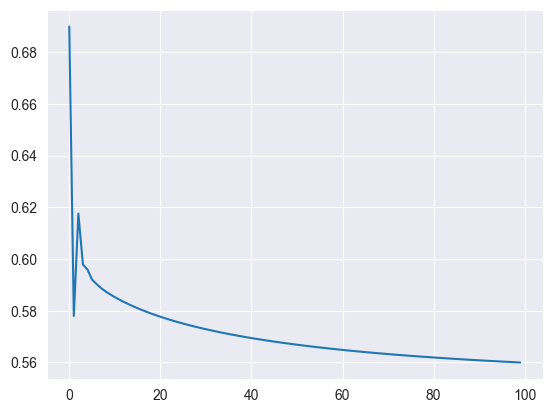

In [21]:
import matplotlib.pyplot as plt
concentrations = [conc['PyrPI'] for conc in species_propagation]
concentrations
plt.plot(concentrations[0:500])

In [59]:
final_propagation = species_propagation[-1]
for s in final_propagation.keys():
    print(s, 'propagation results: ', final_propagation[s], 'simulation results: ', expected_results[s])

EI propagation results:  0.39006100453501935 simulation results:  decreased
PyrPI propagation results:  0.5614712860979437 simulation results:  increased
EIP propagation results:  0.5419299074204625 simulation results:  increased
HPr propagation results:  0.42302998398838354 simulation results:  decreased
EIPHPr propagation results:  0.4822127184106992 simulation results:  decreased
HPrP propagation results:  0.5727865972370842 simulation results:  increased
EIIA propagation results:  0.429865591464771 simulation results:  decreased
HPrPIIA propagation results:  0.5007764595124844 simulation results:  decreased
EIIAP propagation results:  0.5776508244635904 simulation results:  increased
EIICB propagation results:  0.4191452185607992 simulation results:  decreased
EIIAPIICB propagation results:  0.4981095704101313 simulation results:  decreased
EIICBP propagation results:  0.5659394200713055 simulation results:  increased
EIICBPGlc propagation results:  0.502126281483393 simulation res

In [3]:
res = complete_tests.complete_tests2(
            'BIOMD0000000647_concentrations.xml',
            'altered_pathways_concentrations/reaction_6/reaction_6100x.xml',
            'altered_pathways_concentrations/reaction_6/description',
            []
        )

In [4]:
insights = complete_tests.get_insights_confidence_intervals('altered', res, 1, detailed_classification=True, threshold=0, ignore_uncertain=False)

Specie:  Raf1 expected result:  decreased  normal final:  0.07570174983160038  altered final:  0.07109943379740422
confidence interval:  [0.47541594728153547, 0.47969423249849374]
deltas coming from simulation:  [-0.004602316034196169, 0.00013989975744112452]
Specie:  RKIP expected result:  increased  normal final:  4.3411109360891915  altered final:  4.35465633886932
confidence interval:  [0.5442293628083388, 0.5510782782353454]
deltas coming from simulation:  [0.013545402780128057, 1.6906081339740472e-05]
Specie:  Raf1_RKIP expected result:  increased  normal final:  0.5120023463527844  altered final:  0.9327226256609573
confidence interval:  [0.5900546592654604, 0.5986482989698686]
deltas coming from simulation:  [0.4207202793081729, 0.17285619361125454]
Specie:  Raf1_RKIP_ERKPP expected result:  decreased  normal final:  5.4122959038156315  altered final:  4.996177940541635
confidence interval:  [0.3954184843547507, 0.4034243019233305]
deltas coming from simulation:  [-0.4161179632

In [17]:
total_count = 0
correct_count = 0
for specie in insights.keys():
    total_count += 1
    if insights[specie][0] == insights[specie][1]:
        correct_count += 1
print('total experiments: ', total_count, 'correct experiments: ', correct_count, 'ratio: ', correct_count/total_count)

total experiments:  11 correct experiments:  9 ratio:  0.8181818181818182


In [15]:
total_count = 0
correct_count = 0
for specie in insights[2].keys():
    if expected_results[specie] != 'unchanged':
        total_count += 1
    if type(specie) != type(''):
        continue
    print('specie: ', specie)
    scores = np.array(insights[2][specie][-1])
    mean = np.mean(scores)
    std = np.std(scores)
    std_error = std / np.sqrt(len(scores))
    margin = 2 * std_error
    lower = mean - margin
    higher = mean + margin
    print(' lower: ', lower, ' higher: ', higher)
    if lower > 0.5: 
        print('increase, expected: ', expected_results[specie])
        if expected_results[specie] == 'increased':
            correct_count += 1
        
    else: 
        print('decrease, expected: ', expected_results[specie])
        if expected_results[specie] == 'decreased':
            correct_count += 1
print('ratio correct: ', correct_count / total_count, 'correct: ', correct_count, 'total: ', total_count)

specie:  EI
 lower:  0.38702437497141556  higher:  0.3953636208975316
decrease, expected:  decreased
specie:  PyrPI
 lower:  0.577861018531099  higher:  0.5803421882908305
increase, expected:  unchanged
specie:  EIP
 lower:  0.5448553875432113  higher:  0.5577336062892596
increase, expected:  increased
specie:  HPr
 lower:  0.4308218096911517  higher:  0.43915205071853525
decrease, expected:  decreased
specie:  EIPHPr
 lower:  0.4853571550453938  higher:  0.48908389987964895
decrease, expected:  unchanged
specie:  HPrP
 lower:  0.5686229477900122  higher:  0.5769124583736869
increase, expected:  increased
specie:  EIIA
 lower:  0.4445298442942911  higher:  0.451633182968042
decrease, expected:  decreased
specie:  HPrPIIA
 lower:  0.5016945328731048  higher:  0.5040203445065157
increase, expected:  unchanged
specie:  EIIAP
 lower:  0.5513916879586308  higher:  0.5585219603059105
increase, expected:  increased
specie:  EIICB
 lower:  0.4539275436086541  higher:  0.4608547874566425
decrea

<Axes: ylabel='Count'>

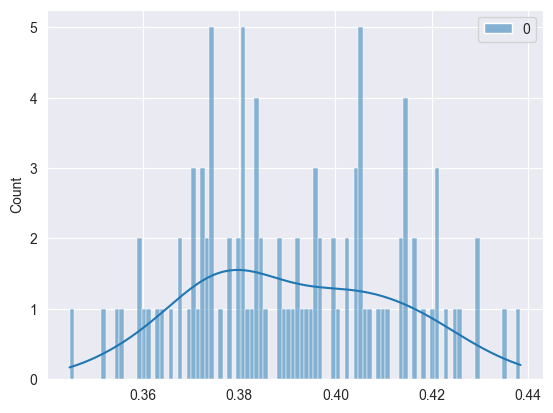

In [16]:
scores = np.array(insights[2]['EI'][-1])
df = pd.DataFrame(scores)
sns.histplot(df, kde=True, bins=100)